In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
# Import file
file = "Resources/Incident_data.txt"
df = pd.read_csv(file, encoding="ISO-8859-1", sep='\t')
display(df)

,Notes,Leading Cancer Sites,Leading Cancer Sites Code,States,States Code,Year,Year Code,Race,Race Code,Sex,Sex Code,Count,Population
0,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Asian or Pacific Islander,A-PI,Female,F,18.0,17708
1,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Black or African American,2054-5,Female,F,597.0,623475
2,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,White,2106-3,Female,F,2360.0,1640665
3,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,White,2106-3,Male,M,19.0,1570643
4,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Other Races and Unknown combined,2131-1,Female,F,27.0,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,standard groupings of primary cancer sites.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,"8. For the 2005 year, the Census Bureau estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,Texas due to Hurricanes Katrina and Rita. CDC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3951,"these states, nor are these counts included in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop all columns without any information
df_dropped = df.drop(columns=['Notes','Leading Cancer Sites Code','Year Code','Sex' ],axis=1)
df_dropped = df_dropped.dropna(how='any')
display(df_dropped)

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
0,Breast,Alabama,1.0,1999.0,Asian or Pacific Islander,A-PI,F,18.0,17708
1,Breast,Alabama,1.0,1999.0,Black or African American,2054-5,F,597.0,623475
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
3,Breast,Alabama,1.0,1999.0,White,2106-3,M,19.0,1570643
4,Breast,Alabama,1.0,1999.0,Other Races and Unknown combined,2131-1,F,27.0,Not Applicable
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [4]:
df_no_other_race = df_dropped[df_dropped["Race"]!="Other Races and Unknown combined"]
df_no_other_race

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
0,Breast,Alabama,1.0,1999.0,Asian or Pacific Islander,A-PI,F,18.0,17708
1,Breast,Alabama,1.0,1999.0,Black or African American,2054-5,F,597.0,623475
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
3,Breast,Alabama,1.0,1999.0,White,2106-3,M,19.0,1570643
5,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,548.0,627439
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [5]:
df_clean_male = df_no_other_race[df_no_other_race["Sex Code"]!="F"]
df_clean_male

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
3,Breast,Alabama,1.0,1999.0,White,2106-3,M,19.0,1570643
7,Breast,Alabama,1.0,2000.0,White,2106-3,M,23.0,1576095
14,Breast,Alabama,1.0,2002.0,White,2106-3,M,27.0,1583267
18,Breast,Alabama,1.0,2003.0,White,2106-3,M,20.0,1590946
27,Breast,Alabama,1.0,2006.0,White,2106-3,M,19.0,1629110
...,...,...,...,...,...,...,...,...,...
3850,Breast,Wisconsin,55.0,2014.0,White,2106-3,M,58.0,2537390
3856,Breast,Wisconsin,55.0,2015.0,White,2106-3,M,50.0,2538114
3862,Breast,Wisconsin,55.0,2016.0,White,2106-3,M,31.0,2539559
3868,Breast,Wisconsin,55.0,2017.0,White,2106-3,M,47.0,2543368


In [9]:
df_clean_male_only = df_clean_male.drop(columns=['Leading Cancer Sites','States','States Code','Year', 'Race Code' ],axis=1)
df_clean_male_only

,Race,Sex Code,Count,Population
3,White,M,19.0,1570643
7,White,M,23.0,1576095
14,White,M,27.0,1583267
18,White,M,20.0,1590946
27,White,M,19.0,1629110
...,...,...,...,...
3850,White,M,58.0,2537390
3856,White,M,50.0,2538114
3862,White,M,31.0,2539559
3868,White,M,47.0,2543368


In [11]:
df_clean_male_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 3 to 3874
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Race        662 non-null    object 
 1   Sex Code    662 non-null    object 
 2   Count       662 non-null    float64
 3   Population  662 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.9+ KB


In [12]:
df_clean_male_only['Population'] = df_clean_male_only['Population'].astype(float)

In [13]:
df_clean_male_only.dtypes

Race           object
Sex Code       object
Count         float64
Population    float64
dtype: object

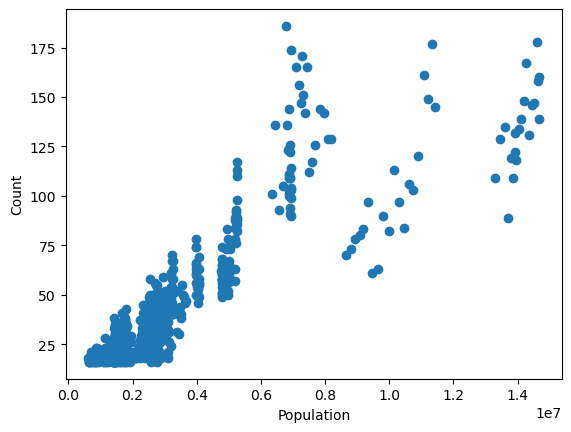

In [14]:
from pathlib import Path
plt.scatter(df_clean_male_only.Population, df_clean_male_only.Count)
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

In [15]:
X = df_clean_male_only.Population.values.reshape(-1, 1)

In [16]:
X.shape

(662, 1)

In [17]:
y = df_clean_male_only.Count

In [18]:
model = LinearRegression()

In [19]:
model.fit(X, y)

LinearRegression()

In [20]:
y_pred = model.predict(X)
print(y_pred.shape)

(662,)


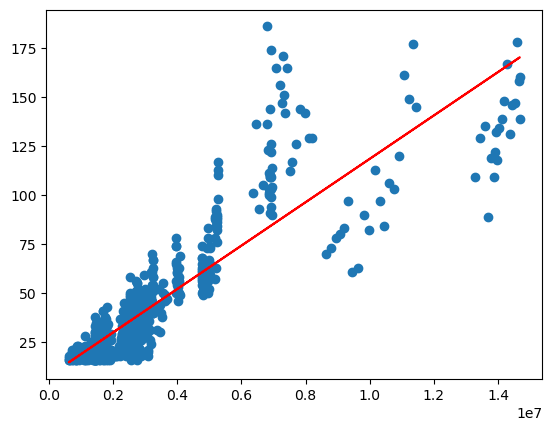

In [21]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [22]:
print(model.coef_)
print(model.intercept_)

[1.10597265e-05]
7.840246309037248
